In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "datasets/haryana_data.csv"
df = pd.read_csv(path, skiprows=13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         53424 non-null  int64  
 1   MO           53424 non-null  int64  
 2   DY           53424 non-null  int64  
 3   HR           53424 non-null  int64  
 4   ALLSKY_KT    53424 non-null  float64
 5   T2M          53424 non-null  float64
 6   QV2M         53424 non-null  float64
 7   PRECTOTCORR  53424 non-null  float64
 8   PS           53424 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.7 MB


In [4]:
dfcpy = df.copy()

In [5]:
dfcpy.describe()

,YEAR,MO,DY,HR,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
count,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000
mean,2020.555368,6.438997,15.707023,11.500000,-504.463314,25.274911,7.560094,-1.301091,97.163607
std,1.749221,3.486892,8.810511,6.922251,499.733944,38.783703,37.380885,36.656099,40.275746
min,2018.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,2019.000000,3.000000,8.000000,5.750000,-999.000000,19.420000,4.390000,0.000000,97.990000
50%,2021.000000,6.000000,16.000000,11.500000,-999.000000,28.000000,6.840000,0.000000,98.650000
75%,2022.000000,9.000000,23.000000,17.250000,0.540000,33.830000,13.610000,0.000000,99.280000
max,2024.000000,12.000000,31.000000,23.000000,0.830000,47.400000,24.350000,114.260000,100.390000


In [6]:
df['ALLSKY_KT'].value_counts()

ALLSKY_KT
-999.00    26991
 0.62       1079
 0.66       1075
 0.59        992
 0.70        962
           ...  
 0.81          7
 0.82          5
 0.04          4
 0.83          4
 0.03          2
Name: count, Length: 82, dtype: int64

In [7]:
dfcpy.drop(columns=['ALLSKY_KT'], inplace=True)

In [8]:
dfcpy


,YEAR,MO,DY,HR,T2M,QV2M,PRECTOTCORR,PS
0,2018,1,1,5,9.42,1.83,0.0,99.17
1,2018,1,1,6,8.75,1.83,0.0,99.22
2,2018,1,1,7,8.57,1.89,0.0,99.28
3,2018,1,1,8,10.89,1.95,0.0,99.34
4,2018,1,1,9,13.25,1.89,0.0,99.39
...,...,...,...,...,...,...,...,...
53419,2024,2,5,0,-999.00,-999.00,-999.0,-999.00
53420,2024,2,5,1,-999.00,-999.00,-999.0,-999.00
53421,2024,2,5,2,-999.00,-999.00,-999.0,-999.00
53422,2024,2,5,3,-999.00,-999.00,-999.0,-999.00


In [9]:
cols=["YEAR","MO","DY"]
dfcpy['DATE'] = dfcpy[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [10]:
dfcpy['DATETIME'] = pd.to_datetime(dfcpy['DATE'] + ' ' + dfcpy['HR'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

In [11]:
dfcpy.drop(columns=['YEAR', 'DY', 'MO', 'HR'], inplace=True)

In [12]:
dfcpy.drop(columns=['DATE'], inplace=True)

In [13]:
dfcpy

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
0,9.42,1.83,0.0,99.17,2018-01-01 05:00:00
1,8.75,1.83,0.0,99.22,2018-01-01 06:00:00
2,8.57,1.89,0.0,99.28,2018-01-01 07:00:00
3,10.89,1.95,0.0,99.34,2018-01-01 08:00:00
4,13.25,1.89,0.0,99.39,2018-01-01 09:00:00
...,...,...,...,...,...
53419,-999.00,-999.00,-999.0,-999.00,2024-02-05 00:00:00
53420,-999.00,-999.00,-999.0,-999.00,2024-02-05 01:00:00
53421,-999.00,-999.00,-999.0,-999.00,2024-02-05 02:00:00
53422,-999.00,-999.00,-999.0,-999.00,2024-02-05 03:00:00


In [14]:
dfcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   T2M          53424 non-null  float64       
 1   QV2M         53424 non-null  float64       
 2   PRECTOTCORR  53424 non-null  float64       
 3   PS           53424 non-null  float64       
 4   DATETIME     53424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 MB


In [15]:
dfcpy.describe()

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
count,53424.000000,53424.000000,53424.000000,53424.000000,53424
mean,25.274911,7.560094,-1.301091,97.163607,2021-01-18 04:30:00
min,-999.000000,-999.000000,-999.000000,-999.000000,2018-01-01 05:00:00
25%,19.420000,4.390000,0.000000,97.990000,2019-07-11 16:45:00
50%,28.000000,6.840000,0.000000,98.650000,2021-01-18 04:30:00
75%,33.830000,13.610000,0.000000,99.280000,2022-07-28 16:15:00
max,47.400000,24.350000,114.260000,100.390000,2024-02-05 04:00:00
std,38.783703,37.380885,36.656099,40.275746,NaN


<Axes: >

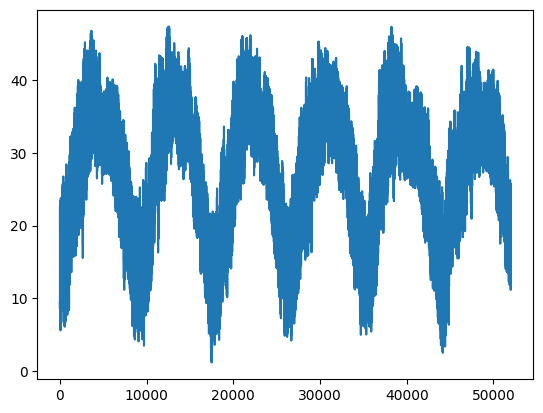

In [16]:
temp = dfcpy['T2M'][:52000]
dfcpy['T2M'][:52000].plot()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [18]:
def plot_predictions(model, X, y, start=0, end=100):
    pred = model.predict(X).flatten()
    df = pd.DataFrame(data={'predictions': pred, 'actuals': y})
    plt.plot(df['predictions'][start:end], label='predicted')
    plt.plot(df['actuals'][start:end], label='actual')
    plt.legend()
    return df

In [19]:
temp_df = pd.DataFrame({'TEMP': temp})
temp_df['DAY'] = df['DY']
temp_df['HOUR'] = df['HR']
temp_df['MONTH'] = df['MO']

In [20]:
temp_df

,TEMP,DAY,HOUR,MONTH
0,9.42,1,5,1
1,8.75,1,6,1
2,8.57,1,7,1
3,10.89,1,8,1
4,13.25,1,9,1
...,...,...,...,...
51995,22.61,7,16,12
51996,20.34,7,17,12
51997,19.39,7,18,12
51998,18.68,7,19,12


In [21]:
def df_to_XY(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [22]:
X, y = df_to_XY(temp_df)
X.shape, y.shape

((51995, 5, 4), (51995,))

In [23]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:51000], y[50000:51000]
X_test, y_test = X[51000:], y[51000:]

In [24]:
X_train

array([[[ 9.42,  1.  ,  5.  ,  1.  ],
        [ 8.75,  1.  ,  6.  ,  1.  ],
        [ 8.57,  1.  ,  7.  ,  1.  ],
        [10.89,  1.  ,  8.  ,  1.  ],
        [13.25,  1.  ,  9.  ,  1.  ]],

       [[ 8.75,  1.  ,  6.  ,  1.  ],
        [ 8.57,  1.  ,  7.  ,  1.  ],
        [10.89,  1.  ,  8.  ,  1.  ],
        [13.25,  1.  ,  9.  ,  1.  ],
        [17.  ,  1.  , 10.  ,  1.  ]],

       [[ 8.57,  1.  ,  7.  ,  1.  ],
        [10.89,  1.  ,  8.  ,  1.  ],
        [13.25,  1.  ,  9.  ,  1.  ],
        [17.  ,  1.  , 10.  ,  1.  ],
        [20.72,  1.  , 11.  ,  1.  ]],

       ...,

       [[37.76, 15.  , 10.  ,  9.  ],
        [38.68, 15.  , 11.  ,  9.  ],
        [39.23, 15.  , 12.  ,  9.  ],
        [39.4 , 15.  , 13.  ,  9.  ],
        [39.11, 15.  , 14.  ,  9.  ]],

       [[38.68, 15.  , 11.  ,  9.  ],
        [39.23, 15.  , 12.  ,  9.  ],
        [39.4 , 15.  , 13.  ,  9.  ],
        [39.11, 15.  , 14.  ,  9.  ],
        [38.57, 15.  , 15.  ,  9.  ]],

       [[39.23, 15.  , 12. 

In [25]:
# model = Sequential()
# model.add(InputLayer((5, 4)))
# model.add(LSTM(64))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='linear'))

# model.summary()

In [26]:
# cp = ModelCheckpoint('', save_best_only=True)
# model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [27]:
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

In [28]:
from tensorflow.keras.models import load_model
model = load_model('haryana/')

32/32 [==============================] - 0s 2ms/step


,predictions,actuals
0,30.940311,32.23
1,33.929153,33.73
2,34.420555,34.55
3,34.601749,34.96
4,34.520424,35.01
...,...,...
990,23.540073,22.61
991,20.586885,20.34
992,18.886675,19.39
993,18.425074,18.68


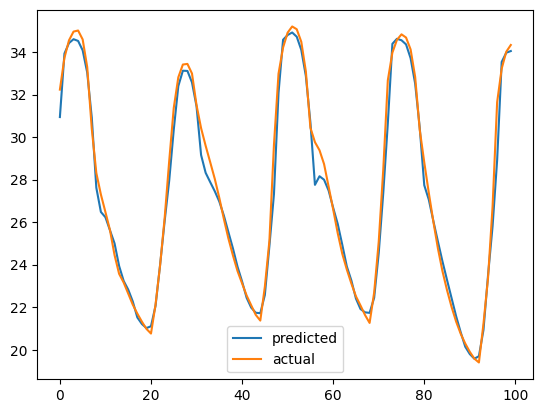

In [29]:
plot_predictions(model, X_test, y_test)

In [30]:
model.predict([[
        [27.37, 15.  , 10.  ,  9.  ],
        [27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ]]])
# needs 5 previous rows for prediction!

1/1 [==============================] - 0s 30ms/step


array([[26.802063]], dtype=float32)

In [114]:
import sqlite3
con = sqlite3.connect('haryana.db')
cur = con.cursor()

cur.execute(
    """
    CREATE TABLE IF NOT EXISTS ha4(
        day INT,
        month INT,
        year INT,
        hour INT,
        temp REAL
    )
    """
)

In [96]:
x = -165
itr = temp_df.iloc[x:x+5].values
itr = itr.tolist()
# will be used for predictions!
# 2024 jan
itr

[[16.37, 1.0, 0.0, 12.0],
 [15.88, 1.0, 1.0, 12.0],
 [15.41, 1.0, 2.0, 12.0],
 [14.98, 1.0, 3.0, 12.0],
 [14.59, 1.0, 4.0, 12.0]]

In [97]:
itr

[[16.37, 1.0, 0.0, 12.0],
 [15.88, 1.0, 1.0, 12.0],
 [15.41, 1.0, 2.0, 12.0],
 [14.98, 1.0, 3.0, 12.0],
 [14.59, 1.0, 4.0, 12.0]]

In [101]:
def plot_day():
    temperatures = []
    window = itr.copy()
    day = window[0][1]
    hour = window[0][2]
    month = window[0][3]
    for i in range(5):
        temperatures.append(window[i][0])
    
    while (hour!=24):
        pred = model.predict(np.expand_dims(window, axis=0))[0][0]
        temperatures.append(pred)
        window.append([pred, day, hour, month])
        window.pop(0)
        window[-1][1] += 0.0
        window[-1][2] += 0.0
        window[-1][3] += 0.0
        hour += 1
        print(hour, pred)
        print(window)
        
    plt.plot([i for i in range(len(temperatures))], temperatures, c='red', label='predicted')
    plt.plot([i for i in range(5)], temperatures[:5], c='blue', label='actual')
    plt.legend()
    plt.title('Weather Prediction for ' + str(day) + ' / ' + str(month) + ' / 2024')
    plt.xlabel('time in hours')
    plt.ylabel('temperature in degree Celsius')
    plt.show()

In [115]:
def commit_values():
    temperatures = []
    window = itr.copy()
    day = window[0][1]
    hour = window[0][2]
    month = window[0][3]
    print(day, hour, month)
    for i in range(5):
        temperatures.append(window[i][0])
    print(temperatures)
    
    while (month>=12):
        pred = model.predict(np.expand_dims(window, axis=0))[0][0]
        temperatures.append(pred)
        window.append([pred, day, hour, month])
        window.pop(0)
        window[-1][1] += 0.0
        window[-1][2] += 0.0
        window[-1][3] += 0.0
        hour += 1
        if (hour>=24):
            hour = 0
            day += 1
            print(day)
            if ((month%2==0 and day==32) or (month%2!=0 and day==31)):
                day = 1
                month = 0 # note this!
        # print(hour, pred)
        # print(window)
        cur.execute("""INSERT INTO ha4 VALUES (?, ?, ?, ?, ?)""", (day, month, 2023, hour, float(pred)))
        con.commit()

In [116]:
commit_values()

1.0 0.0 12.0
[16.37, 15.88, 15.41, 14.98, 14.59]
1/1 [==============================] - 0s 27ms/step
2.0
1/1 [==============================] - 0s 21ms/step
3.0
1/1 [==============================] - 0s 28ms/step
4.0
1/1 [==============================] - 0s 21ms/step
5.0
1/1 [==============================] - 0s 20ms/step
6.0
1/1 [==============================] - 0s 19ms/step
7.0
1/1 [==============================] - 0s 20ms/step
8.0
1/1 [==============================] - 0s 21ms/step
9.0
1/1 [==============================] - 0s 18ms/step
10.0
1/1 [==============================] - 0s 20ms/step
11.0
1/1 [==============================] - 0s 19ms/step
12.0
1/1 [==============================] - 0s 20ms/step
13.0
1/1 [==============================] - 0s 18ms/step
14.0
1/1 [==============================] - 0s 16ms/step
15.0
1/1 [==============================] - 0s 20ms/step
16.0
1/1 [==============================] - 0s 21ms/step
17.0
1/1 [==============================] - 0s 20ms/